In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
dataframe=pd.read_csv("dataset2.csv")
print("*******************************************************")
print()
print("                   Data Selection                     ")
print()
print("******************************************************")
print()
print(dataframe.head(10))
print()

*******************************************************

                   Data Selection                     

******************************************************

  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   
5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88    18   
6  OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F    R   90    18   
7  OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80    12   
8  OAS2_0005  OAS2_0005_MR2  Nondemented      2      1010   M    R   83    12   
9  OAS2_0005  OAS2_00

In [3]:
print("**************************************")
print()
print("    Before Handling Missing Values    ")
print()
print("**************************************")
print()
print(dataframe.isnull().sum())
print() 

**************************************

    Before Handling Missing Values    

**************************************

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           29
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64



In [4]:
median = dataframe['MMSE'].median()
dataframe['MMSE'].fillna(median, inplace=True)
print("****************************************************")
print()
print("     After Handling Missing Values    ")
print()
print("****************************************************")
print()
print("---- 1.Remove missing values in MMSE ----")
print()
print(dataframe.isnull().sum())
print()

median = dataframe['SES'].median()
dataframe['SES'].fillna(median, inplace=True)
print()
print("---- 2.Remove missing values in SES ----")
print()
print(dataframe.isnull().sum())
print()

****************************************************

     After Handling Missing Values    

****************************************************

---- 1.Remove missing values in MMSE ----

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           29
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


---- 2.Remove missing values in SES ----

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64



In [5]:
print("****************************************************")
print()
print("              Before Label Encoding                 ")
print()
print("****************************************************")
print()
print(dataframe['Group'].head(10))
label_encoder = preprocessing.LabelEncoder() 
print("****************************************************")
print()
print("              After Label Encoding                 ")
print()
print("****************************************************")
print()
dataframe['Group']= label_encoder.fit_transform(dataframe['Group'])
print(dataframe['Group'].head(10)) 
dataframe['M/F']= label_encoder.fit_transform(dataframe['M/F']) 
dataframe['Hand'] = label_encoder.fit_transform(dataframe['Hand'])


****************************************************

              Before Label Encoding                 

****************************************************

0    Nondemented
1    Nondemented
2       Demented
3       Demented
4       Demented
5    Nondemented
6    Nondemented
7    Nondemented
8    Nondemented
9    Nondemented
Name: Group, dtype: object
****************************************************

              After Label Encoding                 

****************************************************

0    2
1    2
2    1
3    1
4    1
5    2
6    2
7    2
8    2
9    2
Name: Group, dtype: int32


In [6]:
feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']


X = dataframe[feature_col_names].values
y = dataframe[predicted_class_names].values

#spliting the x and y into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [7]:
#initialize the model
svm = SVC(kernel="linear", C=0.1,random_state=0)

#fitting the model
svm.fit(X_train, y_train.ravel())

#predict the model
pred_svm = svm.predict(X_test)


In [8]:
#=== confusion matrix ===
print("******************************************************")
print()
print("          Performance Metrics for SVM                 ")
print()
print("******************************************************")
cm_svm=confusion_matrix(y_test,pred_svm)
print()
print("1.Confusion Matrix",cm_svm)
print()

#find the performance metrics 
TP = cm_svm[1][1]
FP = cm_svm[0][1]
FN = cm_svm[1][0]
TN = cm_svm[0][0]

#Total TP,TN,FP,FN
Total=TP+FP+FN+TN

#Accuracy Calculation
accuracy1=((TP+TN)/Total)*100
print("2.Accuracy",accuracy1,'%')
print()

#Precision Calculation
precision=TP/(TP+FP)*100
print("3.Precision",precision,'%')
print()

#Sensitivity Calculation
Sensitivity=TP/(TP+FN)*100
print("4.Sensitivity",Sensitivity,'%')
print()

#specificity Calculation
specificity = (TN / (TN+FP))*100
print("5.specificity",specificity,'%')
print()

******************************************************

          Performance Metrics for SVM                 

******************************************************

1.Confusion Matrix [[ 1  3  3]
 [ 2 43 15]
 [ 0  6 77]]

2.Accuracy 89.79591836734694 %

3.Precision 93.47826086956522 %

4.Sensitivity 95.55555555555556 %

5.specificity 25.0 %



In [9]:
#initialize the model
lr = linear_model.LogisticRegression()
#fitting the model
lr.fit(X_train, y_train.ravel())

#predict the model
pred_lr = lr.predict(X_test)

In [10]:
#=== confusion matrix ===
print("******************************************************")
print()
print("          Performance Metrics for LR                ")
print()
print("******************************************************")
print()
cm_lr=confusion_matrix(y_test,pred_lr)
print()
print("1.Confusion Matrix",cm_lr)
print()

#find the performance metrics 
TP = cm_lr[1][1]
FP = cm_lr[0][1]
FN = cm_lr[1][0]
TN = cm_lr[0][0]


#Total TP,TN,FP,FN
Total=TP+FP+FN+TN

#Accuracy Calculation
accuracy2=((TP+TN)/Total)*100
print("2.Accuracy",accuracy2,'%')
print()

#Precision Calculation
precision=TP/(TP+FP)*100
print("3.Precision",precision,'%')
print()

#Sensitivity Calculation
Sensitivity=TP/(TP+FN)*100
print("4.Sensitivity",Sensitivity,'%')
print()

#specificity Calculation
specificity = (TN / (TN+FP))*100
print("5.specificity",specificity,'%')
print()



******************************************************

          Performance Metrics for LR                

******************************************************


1.Confusion Matrix [[ 0  0  7]
 [ 1 37 22]
 [ 4 10 69]]

2.Accuracy 97.36842105263158 %

3.Precision 100.0 %

4.Sensitivity 97.36842105263158 %

5.specificity nan %



In [11]:
#disease prection
for i in range(1,10):
    if pred_lr[i]== 2:
        print("**************************")
        print()
        print([i],' Demented ')
        print()
        print("**************************")
        print()
    else:
        print("**************************")
        print()
        print([i],'Non Demented ')
        print()
        print("*************************")
        print()


**************************

[1]  Demented 

**************************

**************************

[2]  Demented 

**************************

**************************

[3]  Demented 

**************************

**************************

[4]  Demented 

**************************

**************************

[5]  Demented 

**************************

**************************

[6] Non Demented 

*************************

**************************

[7]  Demented 

**************************

**************************

[8]  Demented 

**************************

**************************

[9] Non Demented 

*************************



In [12]:
#algorithm comparion 
if(accuracy1>accuracy2):
    print("*****************************************************")
    print()
    print("        Support vector machine is efficient     ")
    print()
    print("*****************************************************")
else:
    print("*****************************************************")
    print()
    print("        Logistic regression is efficient             ")
    print()
    print("*****************************************************")


*****************************************************

        Logistic regression is efficient             

*****************************************************


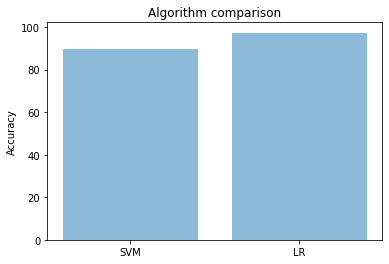

In [13]:
objects = ('SVM', 'LR')
y_pos = np.arange(len(objects))
performance = [accuracy1,accuracy2]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm comparison')
plt.show()